In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.20.0


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

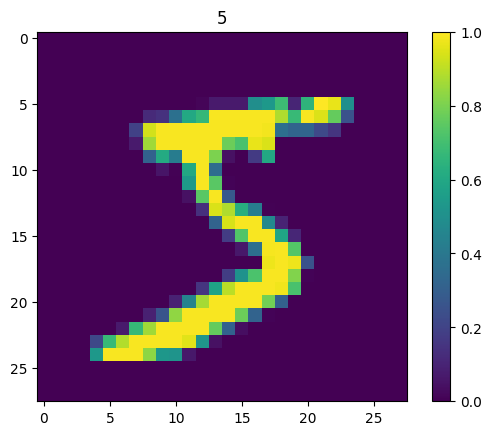

In [4]:
plt.title(y_train[0])
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [5]:
# Always flatten to enter a danse layer (vector)

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# batch_size = number of samples that will be propagated through the network, looking for gradient on that batch
hist = model.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 0.9253 - loss: 0.2621
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9675 - loss: 0.1080
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - accuracy: 0.9769 - loss: 0.0768
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.9819 - loss: 0.0572
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.9858 - loss: 0.0439
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.9882 - loss: 0.0372
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.9909 - loss: 0.0277
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - accuracy: 0.9923 - loss: 0.0241
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - accuracy: 0.9931 - loss: 0.0212
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.9940 - loss: 0.0178


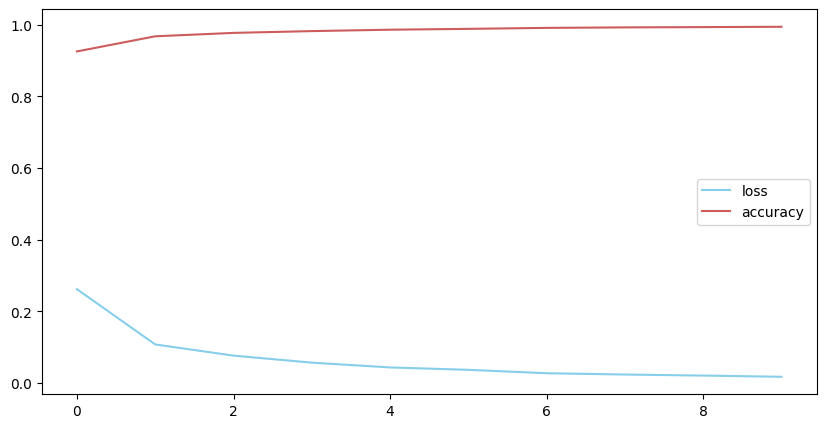

In [8]:
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], label='loss', color='skyblue')
plt.plot(hist.history['accuracy'], label='accuracy', color='indianred')
plt.legend()
plt.show() 

In [9]:
#Loss and accuracy 
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.9787 - loss: 0.0799


[0.07987560331821442, 0.9786999821662903]

In [10]:
y_hat_test = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step


In [11]:
y_hat_test_labels = np.argmax(y_hat_test, axis=1)

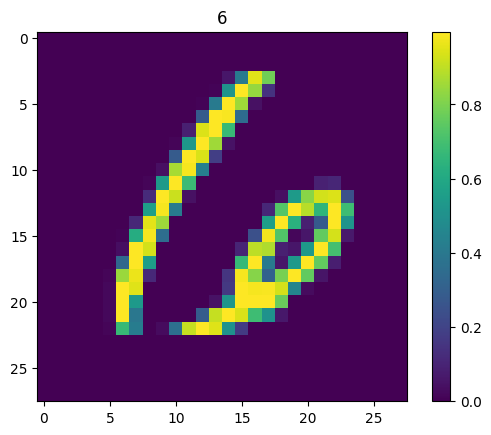

In [12]:
n_data = 9940

plt.title(y_hat_test_labels[n_data])
plt.imshow(x_test[n_data])
plt.colorbar()
plt.show()